/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 14.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 14.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 14.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 14.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 14.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 14.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 14.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_birch.py:726: ConvergenceWarning: Number of subclusters found (1) by BIRCH is less than (3). Decrease the threshold.
  warnings.warn(


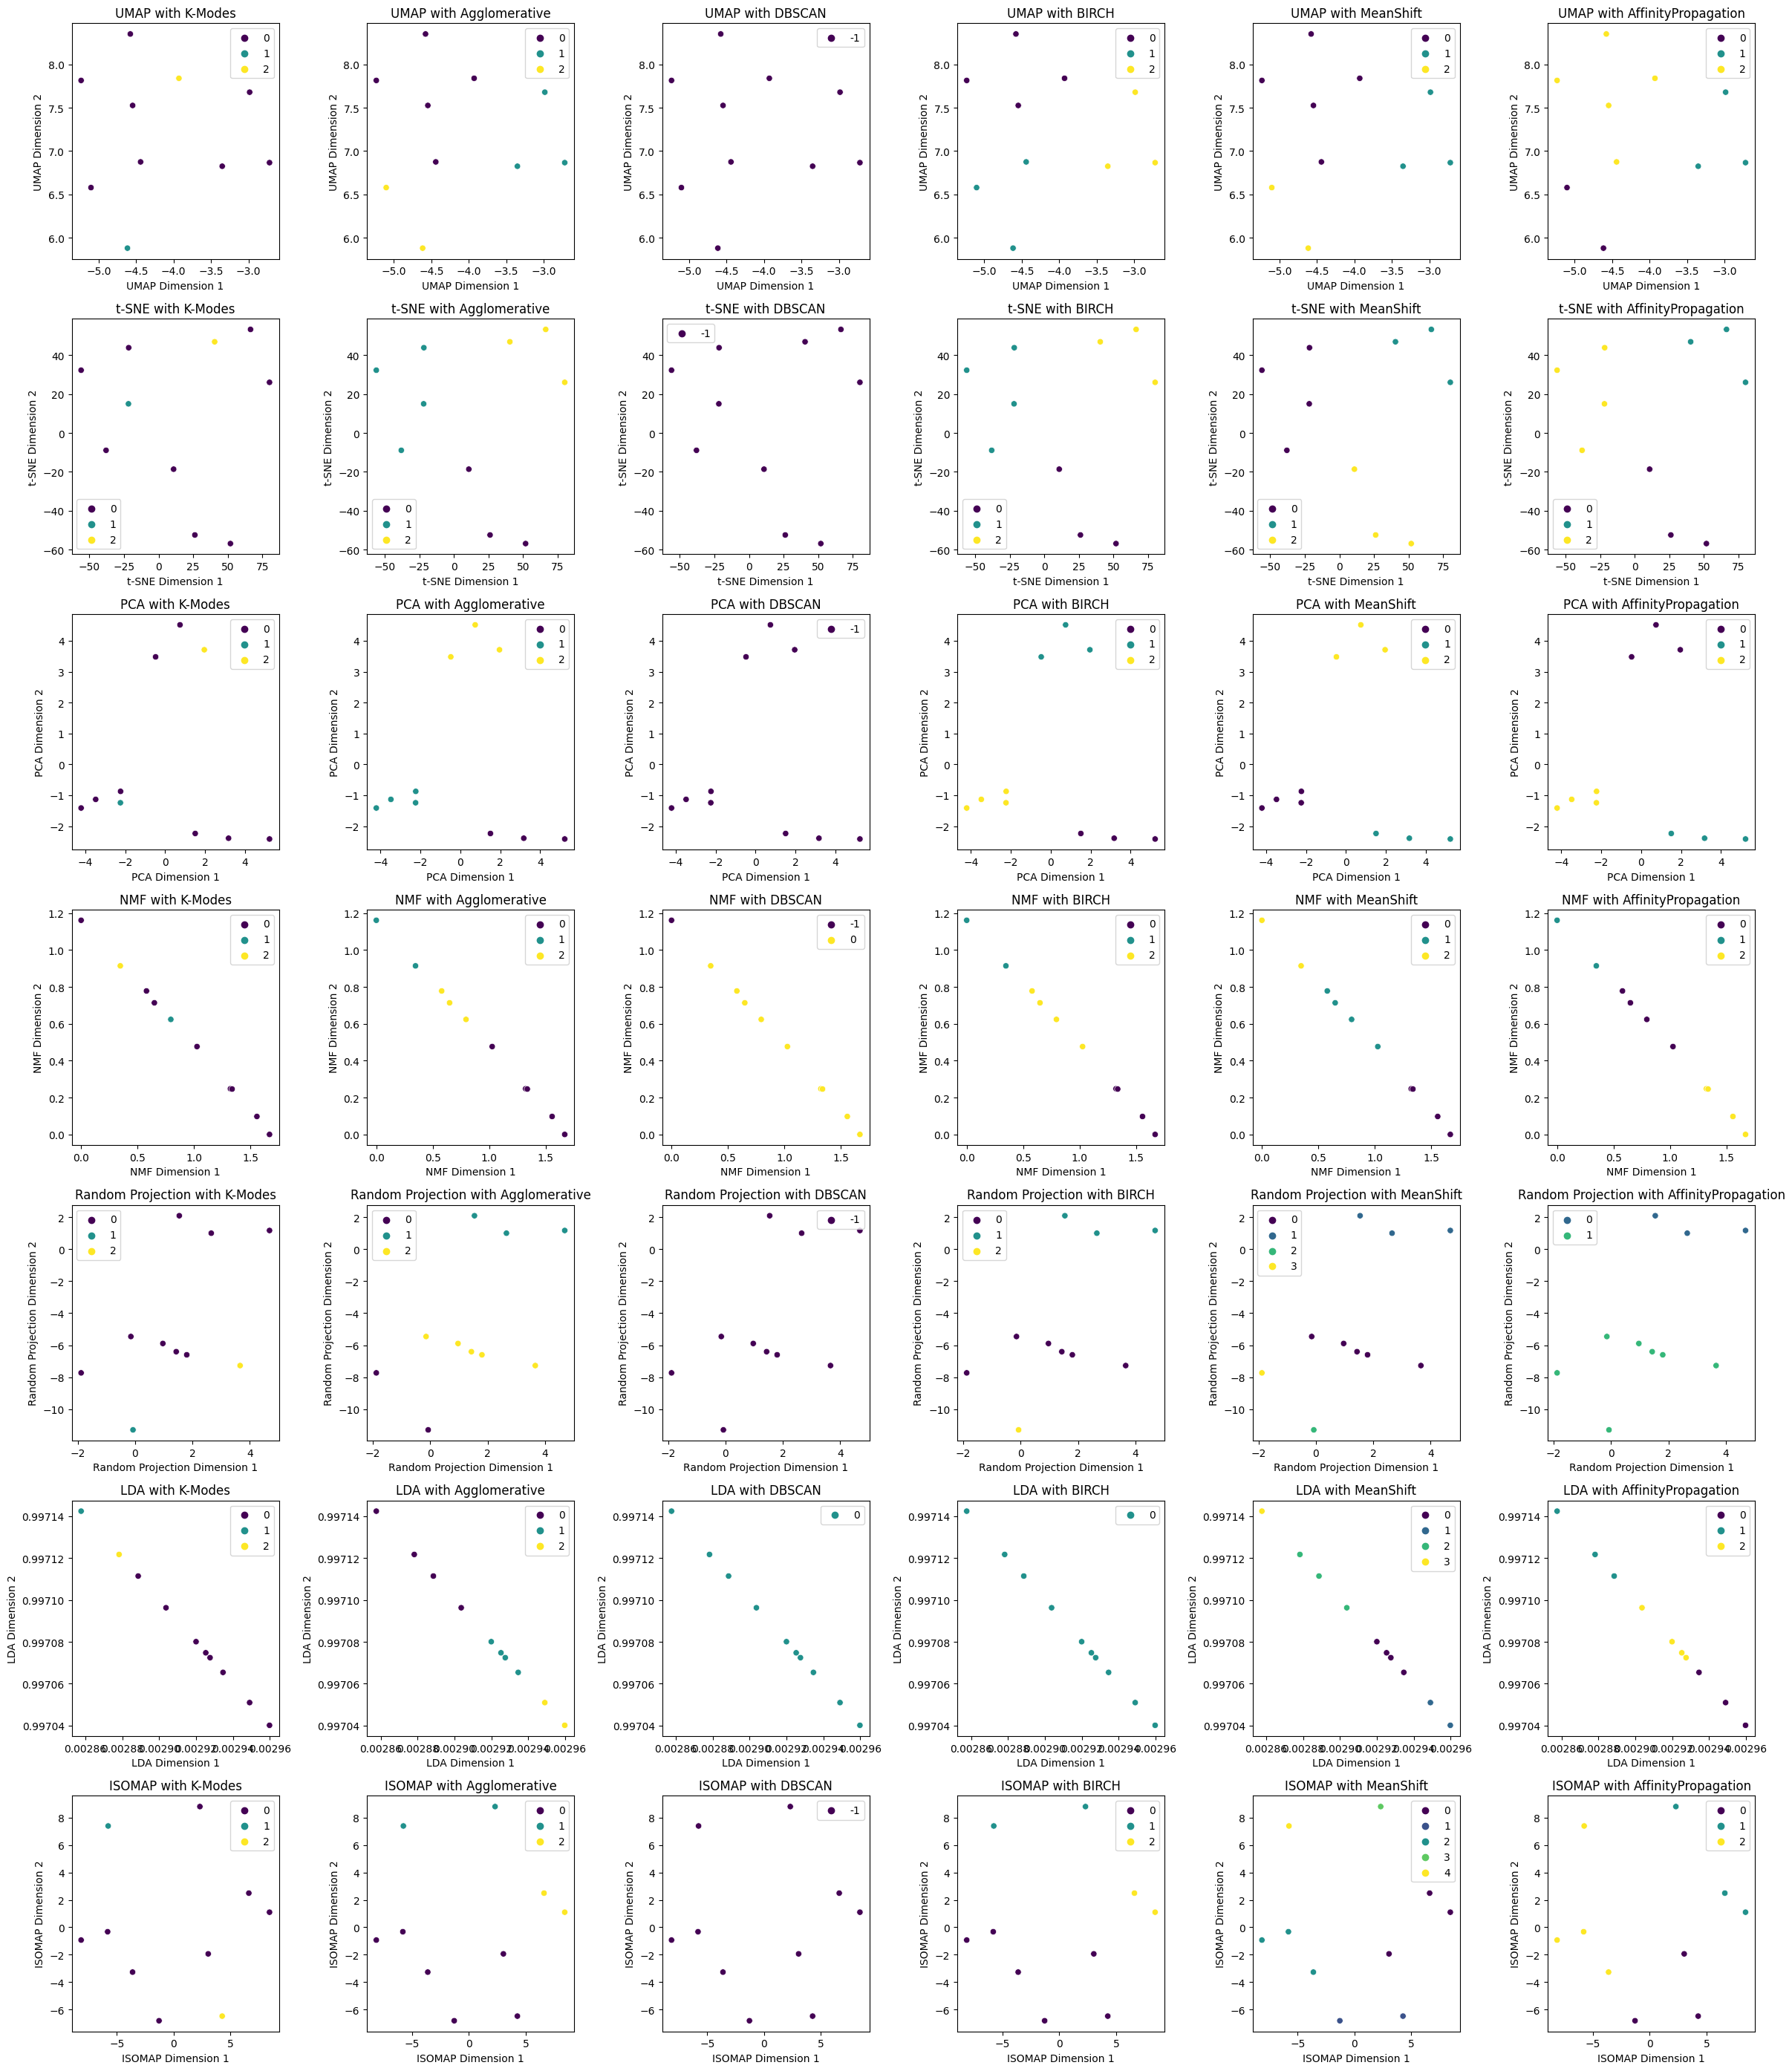

In [1]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import random
from umap import UMAP
from sklearn.manifold import TSNE, Isomap
from sklearn.decomposition import PCA, NMF, LatentDirichletAllocation
from sklearn.random_projection import GaussianRandomProjection
from sklearn.preprocessing import MinMaxScaler
from kmodes.kmodes import KModes
from sklearn.cluster import AgglomerativeClustering, DBSCAN, Birch, MeanShift, AffinityPropagation

# Generate 10000 client responses with 10 different categories
categories = [
    "Excellent product, highly recommend!",
    "Average service, could be improved.",
    "Not satisfied with the quality.",
    "Outstanding experience, top-notch service!",
    "Fair product for the price.",
    "Poor customer support, needs enhancement.",
    "Satisfied with the overall experience.",
    "Great value for money.",
    "Disappointed with the product.",
    "Excellent service, exceeded expectations."
]

# Generate 10000 client responses randomly selecting from the categories
client_responses = [random.choice(categories) for _ in range(10000)]

# Extract unique categories
unique_categories = list(set(categories))

# Load a pre-trained BERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Generate sentence embeddings for unique categories
category_embeddings = model.encode(unique_categories)

# Normalize embeddings to ensure non-negative values
scaler = MinMaxScaler()
category_embeddings = scaler.fit_transform(category_embeddings)

# Define dimensionality reduction techniques: UMAP, t-SNE, PCA, NMF, Random Projection, LDA, ISOMAP
umap_embeddings = UMAP(n_components=2, random_state=42).fit_transform(category_embeddings)
tsne_embeddings = TSNE(n_components=2, perplexity=5, random_state=42).fit_transform(category_embeddings)
pca_embeddings = PCA(n_components=2, random_state=42).fit_transform(category_embeddings)
nmf_embeddings = NMF(n_components=2, random_state=42).fit_transform(category_embeddings)
rp_embeddings = GaussianRandomProjection(n_components=2, random_state=42).fit_transform(category_embeddings)
lda_embeddings = LatentDirichletAllocation(n_components=2, random_state=42).fit_transform(category_embeddings)
isomap_embeddings = Isomap(n_components=2).fit_transform(category_embeddings)

embeddings = {
    'UMAP': umap_embeddings,
    't-SNE': tsne_embeddings,
    'PCA': pca_embeddings,
    'NMF': nmf_embeddings,
    'Random Projection': rp_embeddings,
    'LDA': lda_embeddings,
    'ISOMAP': isomap_embeddings
}

# Different clustering methods
clustering_algorithms = {
    'K-Modes': KModes(n_clusters=3, init='Huang', n_init=5, verbose=1, random_state=42),
    'Agglomerative': AgglomerativeClustering(n_clusters=3),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'BIRCH': Birch(n_clusters=3),
    'MeanShift': MeanShift(),
    'AffinityPropagation': AffinityPropagation(),
    # Add more clustering methods if needed...
}

# Apply clustering for each combination of dimensionality reduction and clustering method
results = {}
for emb_method, emb in embeddings.items():
    results[emb_method] = {}
    for clus_method, clus_algo in clustering_algorithms.items():
        if clus_method in ['K-Prototypes', 'Fuzzy C-Means']:
            clusters = clus_algo.fit_predict(category_embeddings)  # Use original category embeddings
        else:
            clusters = clus_algo.fit_predict(emb)
        results[emb_method][clus_method] = clusters

# Create subplots for each combination of dimensionality reduction and clustering method
# Create subplots for each combination of dimensionality reduction and clustering method
fig, axs = plt.subplots(7, 6, figsize=(24, 28))

for i, (emb_method, emb) in enumerate(embeddings.items()):
    for j, (clus_method, clusters) in enumerate(results[emb_method].items()):
        ax = axs[i][j]
        sns.scatterplot(data=emb, x=emb[:, 0], y=emb[:, 1], hue=clusters, palette='viridis', ax=ax)
        ax.set_xlabel(f'{emb_method} Dimension 1')
        ax.set_ylabel(f'{emb_method} Dimension 2')
        ax.set_title(f'{emb_method} with {clus_method}')

plt.tight_layout()
plt.show()